In [9]:
from thesis import METRICS_PATH
import pandas as pd
metrics_path = METRICS_PATH
METRICS_DF = pd.read_csv(metrics_path)

In [85]:
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

MODELS = ['ButterflyPipeline', 'ScPreGanPipeline', 'ScGenPipeline']
METRICS = ['DEGs', 'r2mean', 'r2mean_top20_boostrap_mean', 'r2mean_top100_boostrap_mean']
color_maps = {
    'ButterflyPipeline': cm.Blues,
    'ScPreGanPipeline': cm.Oranges,
    'ScGenPipeline': cm.Greens
}

def get_transparent_cmap(base_cmap, alpha=0.5):
    base = plt.get_cmap(base_cmap)
    cmap = base(np.arange(base.N))
    cmap[:, -1] = alpha  # Set the alpha channel
    return ListedColormap(cmap)

color_maps = {
    'ButterflyPipeline': get_transparent_cmap('Blues', alpha=0.7),
    'ScPreGanPipeline': get_transparent_cmap('Oranges', alpha=0.7),
    'ScGenPipeline': get_transparent_cmap('Greens', alpha=0.7)
}


In [41]:
METRICS_DF


,model,dataset,experiment_name,perturbation,dose,DEGs,r2mean,r2mean_top20,r2mean_top100,r2mean_top20_boostrap_mean,r2mean_top100_boostrap_mean,cell_type_test,average_mean_expressed_diff,average_fractions_diff,average_mean_degs20_diff,average_mean_degs100_diff
0,ButterflyPipeline,PbmcPipeline,NaN,ifn-b,0.0,61,0.937,0.941,0.986,0.954907,0.938905,CD4T,0.887969,0.284735,0.289858,0.656197
1,ButterflyPipeline,PbmcPipeline,NaN,ifn-b,0.0,74,0.974,0.970,0.941,0.964150,0.969834,CD14+Mono,0.880809,0.171740,0.061008,0.339943
2,ButterflyPipeline,PbmcPipeline,NaN,ifn-b,0.0,54,0.850,0.918,0.927,0.937235,0.906054,B,0.878579,0.283226,0.358259,0.675000
3,ButterflyPipeline,PbmcPipeline,NaN,ifn-b,0.0,87,0.980,0.978,0.976,0.971988,0.975125,FCGR3A+Mono,0.882943,0.136971,0.095720,0.404555
4,ButterflyPipeline,PbmcPipeline,NaN,ifn-b,0.0,59,0.854,0.927,0.929,0.930028,0.780989,NK,0.897270,0.353684,0.403392,0.656524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,ScGenPipeline,NaultPipeline,NaN,tcdd,30.0,5,0.792,0.607,0.523,0.794005,0.650467,T Cells,0.904304,0.813766,0.724574,0.749347
288,ScGenPipeline,NaultPipeline,NaN,tcdd,30.0,5,0.654,0.504,0.360,0.347726,0.326598,Subtype 1,0.881350,0.786780,0.672200,0.737061
289,ScGenPipeline,NaultPipeline,NaN,tcdd,30.0,6,0.805,0.461,0.378,0.369870,0.475551,Stellate Cells,0.824407,0.747411,0.695436,0.629329
290,ScGenPipeline,NaultPipeline,NaN,tcdd,10.0,9,0.929,0.922,0.968,0.965469,0.914741,Portal Fibroblasts,0.865139,0.723977,0.598879,0.718115


In [28]:
scgen = METRICS_DF[METRICS_DF['model'] == 'ScGenPipeline']
scgen = scgen[scgen['dataset'] == 'NaultPipeline']
scgen = scgen[scgen['dose'] == 0.01].sort_values('cell_type_test')
#scgen = scgen[scgen['dose'] == 0.1]
scgen
print(scgen['cell_type_test'].to_list())
#print(scgen['dose'].to_list())

['B Cells', 'Cholangiocytes', 'Endothelial Cells', 'Hepatocytes - central', 'Hepatocytes - portal', 'Macrophage', 'Neutrophils', 'Portal Fibroblasts', 'Stellate Cells', 'Subtype 1', 'T Cells']


## 2d metrics per cell type and per batch

In [145]:
from typing import Optional
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from typing import List
from enum import Enum


def _plot_2d_metrics(dataset: DataFrame, title: str, x_labels: List[str], metrics: List[str] = ['DEGs', 'r2mean', 'r2mean_top20_boostrap_mean', 'r2mean_top100_boostrap_mean']):    
    x = np.arange(len(x_labels))
    width = 0.2

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()

    for i, metric in enumerate(metrics):
        ax = axes[i]

        start = - (len(MODELS) // 2) 
        start = start if len(MODELS) % 2 != 0 else start - 1
        end = len(MODELS) // 2
        x_bars = [x + i*width for i in range(start,end+1,1 )]
        for model, x_bar in zip(MODELS, x_bars):
            ax.bar(x_bar, dataset[dataset['model'] == model][metric], width, label=model, alpha=0.7)

        ax.set_xticks(x)
        ax.set_xticklabels(x_labels, rotation=45, ha='right')
        ax.set_ylabel(metric)
        #ax.set_title(f"Comparison of {metric}")

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)
    fig.suptitle(title)

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space at the top for the legend
    plt.show()
        
    
    ## add distance metrics
    

def plot_2d_metrics_per_dosage(dataset_pipeline: str, title: str, cell_type: str, perturbation: Optional[str] = None):
    dataset = METRICS_DF[METRICS_DF['dataset'] == dataset_pipeline]
    dataset = dataset[dataset['cell_type_test'] == cell_type].sort_values('dose')
    dosages = sorted(dataset['dose'].unique().tolist()) #dataset['dose'].unique().tolist()
    assert len(dosages) > 1
    _plot_2d_metrics(dataset=dataset, title=title, x_labels=dosages)
    


def plot_2d_metrics_per_cell_type(dataset_pipeline: str, title: str, dosage: Optional[float] = None, perturbation: Optional[str] = None):
    dataset = METRICS_DF[METRICS_DF['dataset'] == dataset_pipeline]
    if dosage is not None:
        dataset = dataset[dataset['dose'] == dosage]
    if perturbation is not None:
        dataset = dataset[dataset['perturbation'] == perturbation]
        
    dataset = dataset.sort_values('cell_type_test')
    cell_types = sorted(dataset['cell_type_test'].unique().tolist())
    _plot_2d_metrics(dataset=dataset, title=title, x_labels=cell_types)


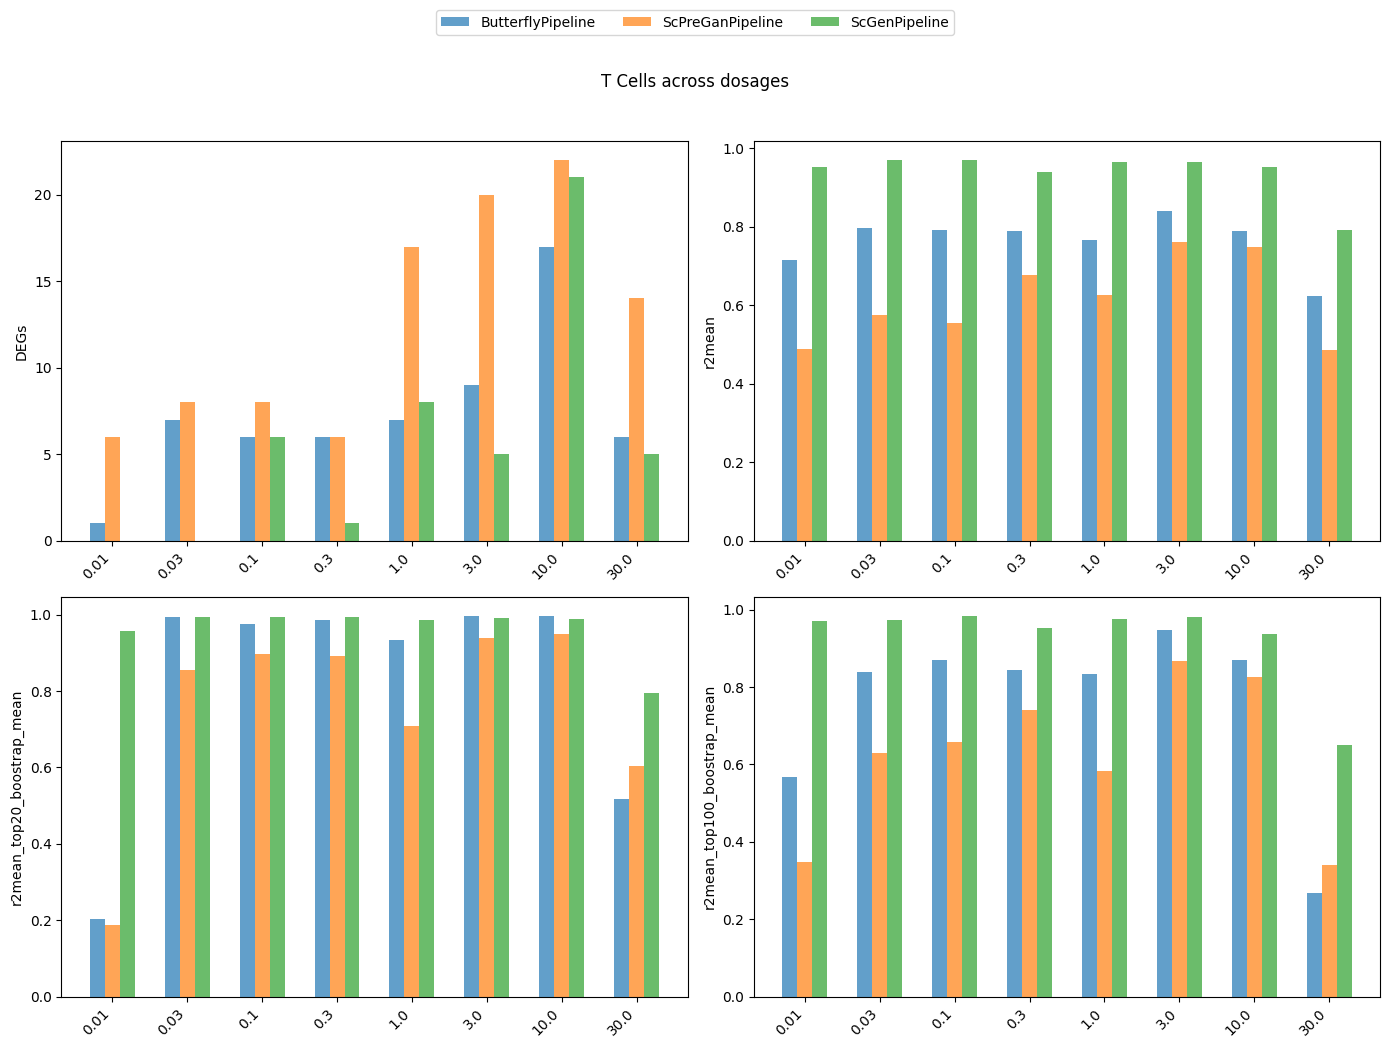

In [146]:
plot_2d_metrics_per_dosage(dataset_pipeline='NaultPipeline', cell_type='T Cells', title='T Cells across dosages')

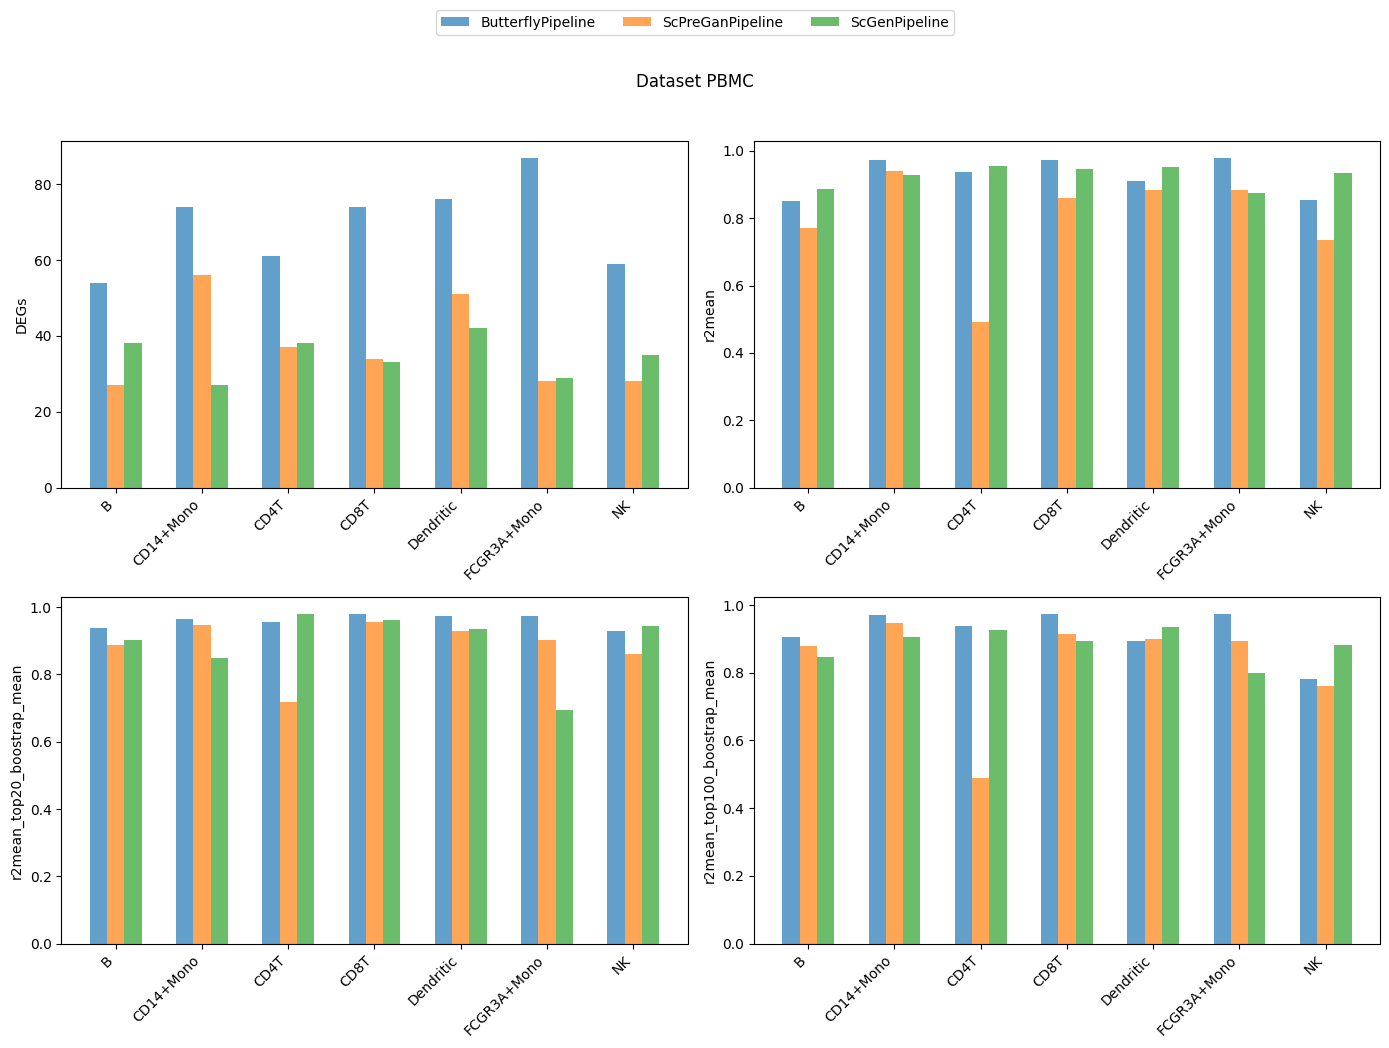

In [147]:

plot_2d_metrics_per_cell_type(dataset_pipeline='PbmcPipeline', title='Dataset PBMC')

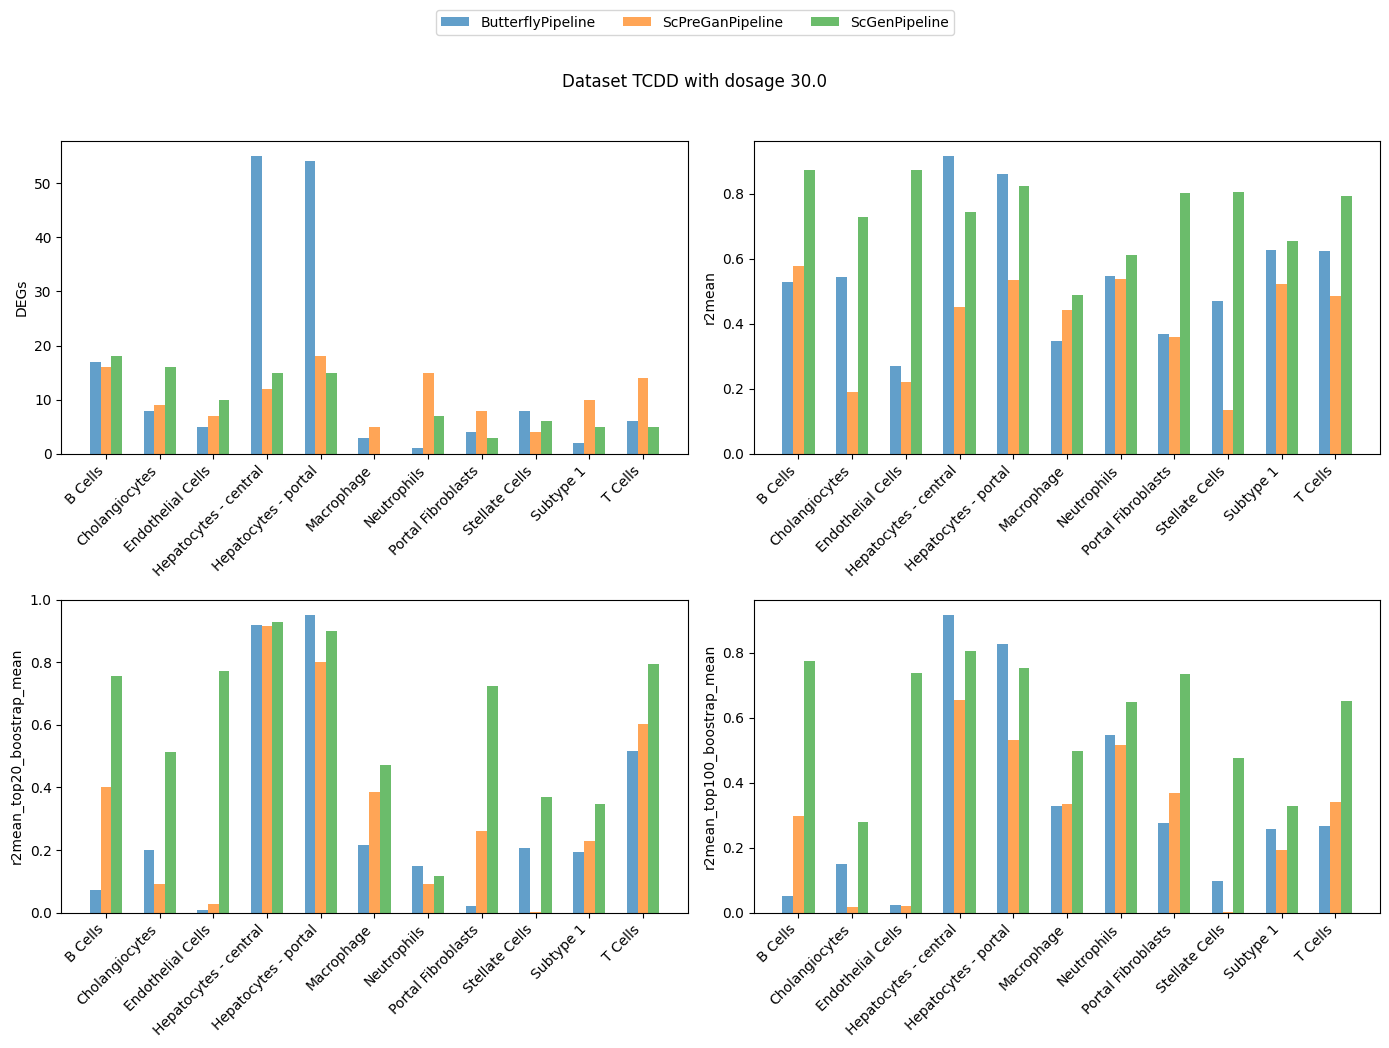

In [148]:
plot_2d_metrics_per_cell_type(dataset_pipeline="NaultPipeline", dosage=30.0, title='Dataset TCDD with dosage 30.0')


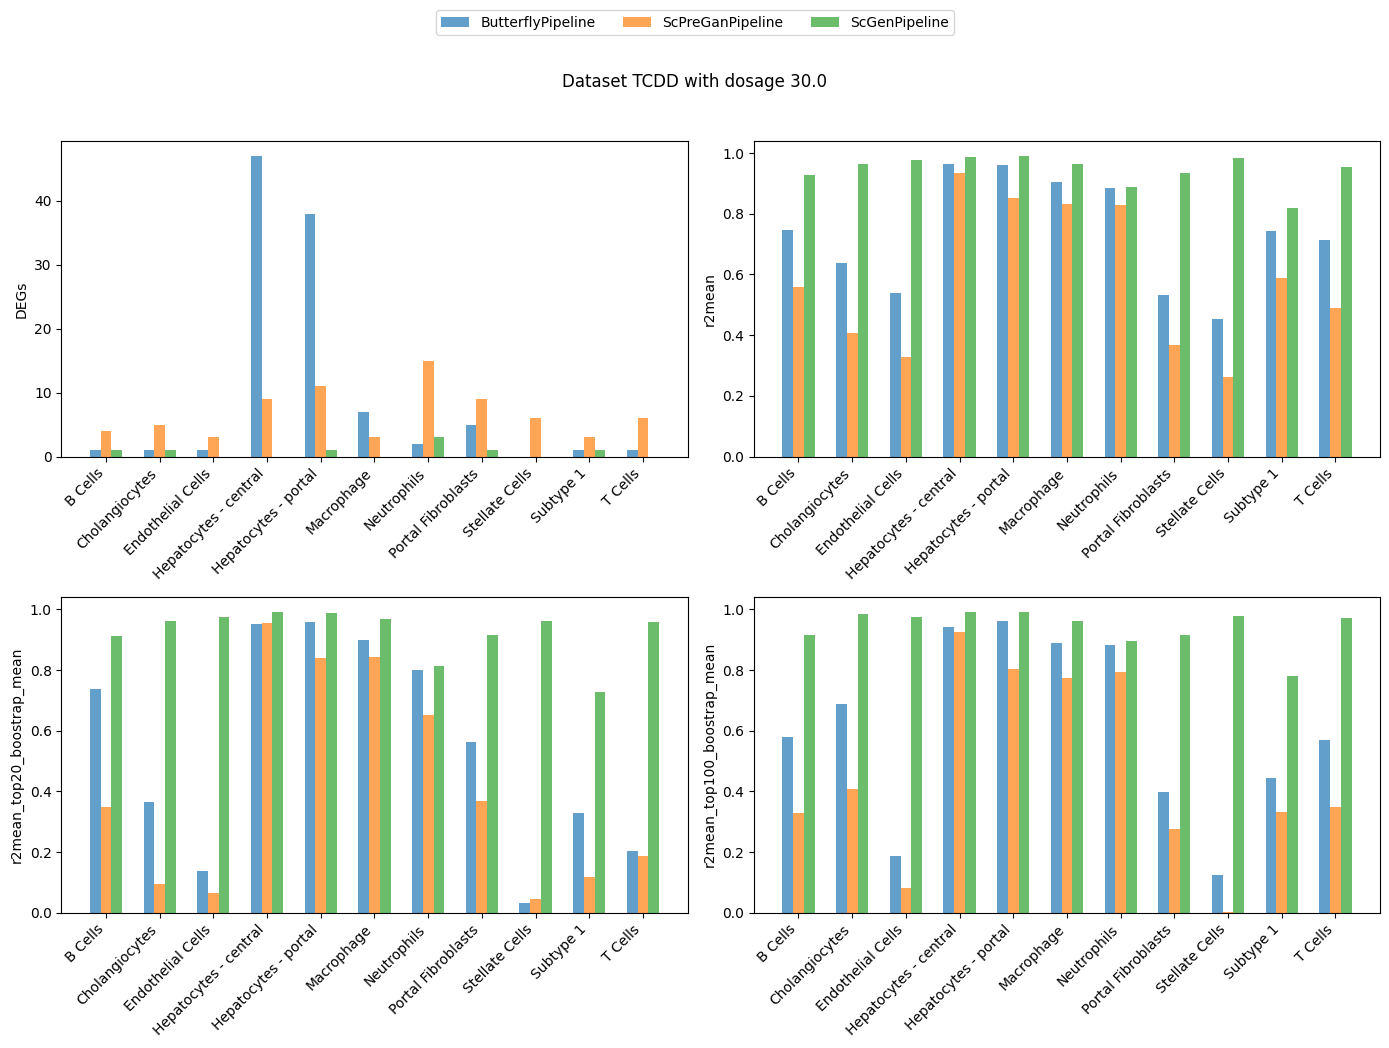

In [149]:
plot_2d_metrics_per_cell_type(dataset_pipeline="NaultPipeline", dosage=0.01, title='Dataset TCDD with dosage 30.0')


## 2d plots reducing across cell types or dosages

In [151]:
from enum import Enum
from typing import List
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


class PlotType(Enum):
    Violin = 0
    Boxplot = 1


class DimToReduce(Enum):
    X = 0
    Y = 1


def get_plot(
    metric: str,
    dataset_name: str,
    x_key: str,
    y_key: str,
    title: str,
    dim_to_reduce: DimToReduce,
    plot_type=PlotType.Violin,
    metrics: List[str] = [
        "DEGs",
        "r2mean",
        "r2mean_top20_boostrap_mean",
        "r2mean_top100_boostrap_mean",
    ],
):
    dataset = METRICS_DF[METRICS_DF["dataset"] == dataset_name].sort_values(
        by=[x_key, y_key]
    )
    x_labels = sorted(dataset[x_key].unique().tolist())
    y_labels = sorted(dataset[y_key].unique().tolist())

    x = np.arange(len(x_labels))
    y = np.arange(len(y_labels))
    width = 0.2

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()

    x_labels = x_labels if dim_to_reduce == DimToReduce.Y else y_labels
    x = x if dim_to_reduce == DimToReduce.Y else y
    x_key = x_key if dim_to_reduce == DimToReduce.Y else y_key

    # Plot each metric on a different subplot
    for i, metric in enumerate(metrics):
        ax = axes[i]

        start = -(len(MODELS) // 2)
        start = start if len(MODELS) % 2 != 0 else start - 1
        end = len(MODELS) // 2
        x_bars = [x + i * width for i in range(start, end + 1, 1)]
        for model_index, (model, x_bar) in enumerate(zip(MODELS, x_bars)):
            dataset_model = dataset[dataset["model"] == model]

            plot_data = []
            for x_label in x_labels:
                plot_data.append(
                    dataset_model[dataset_model[x_key] == x_label][metric].values.tolist()
                )

            if plot_type == PlotType.Violin:
                ax.violinplot(
                    dataset=plot_data,
                    positions=x_bar,
                    widths=width,
                    vert=True,
                    showmedians=True,
                )
            elif plot_type == PlotType.Boxplot:
                ax.boxplot(
                    plot_data,
                    positions=x_bar,
                    widths=width,
                    patch_artist=True,
                    boxprops=dict(facecolor=f"C{model_index}", color="black"),
                    medianprops=dict(color="black"),
                )
            else: 
                raise NotImplementedError

        ax.set_xticks(x)
        ax.set_xticklabels(x_labels, rotation=45, ha="right")
        ax.set_ylabel(metric)

    # Create custom legend handles
    legend_handles = [mpatches.Patch(color=f"C{i}", label=model) for i, model in enumerate(MODELS)]
    
    # Add custom legend
    fig.legend(legend_handles, [model for model in MODELS], loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=3)
    fig.suptitle(title)

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space at the top for the legend
    plt.show()


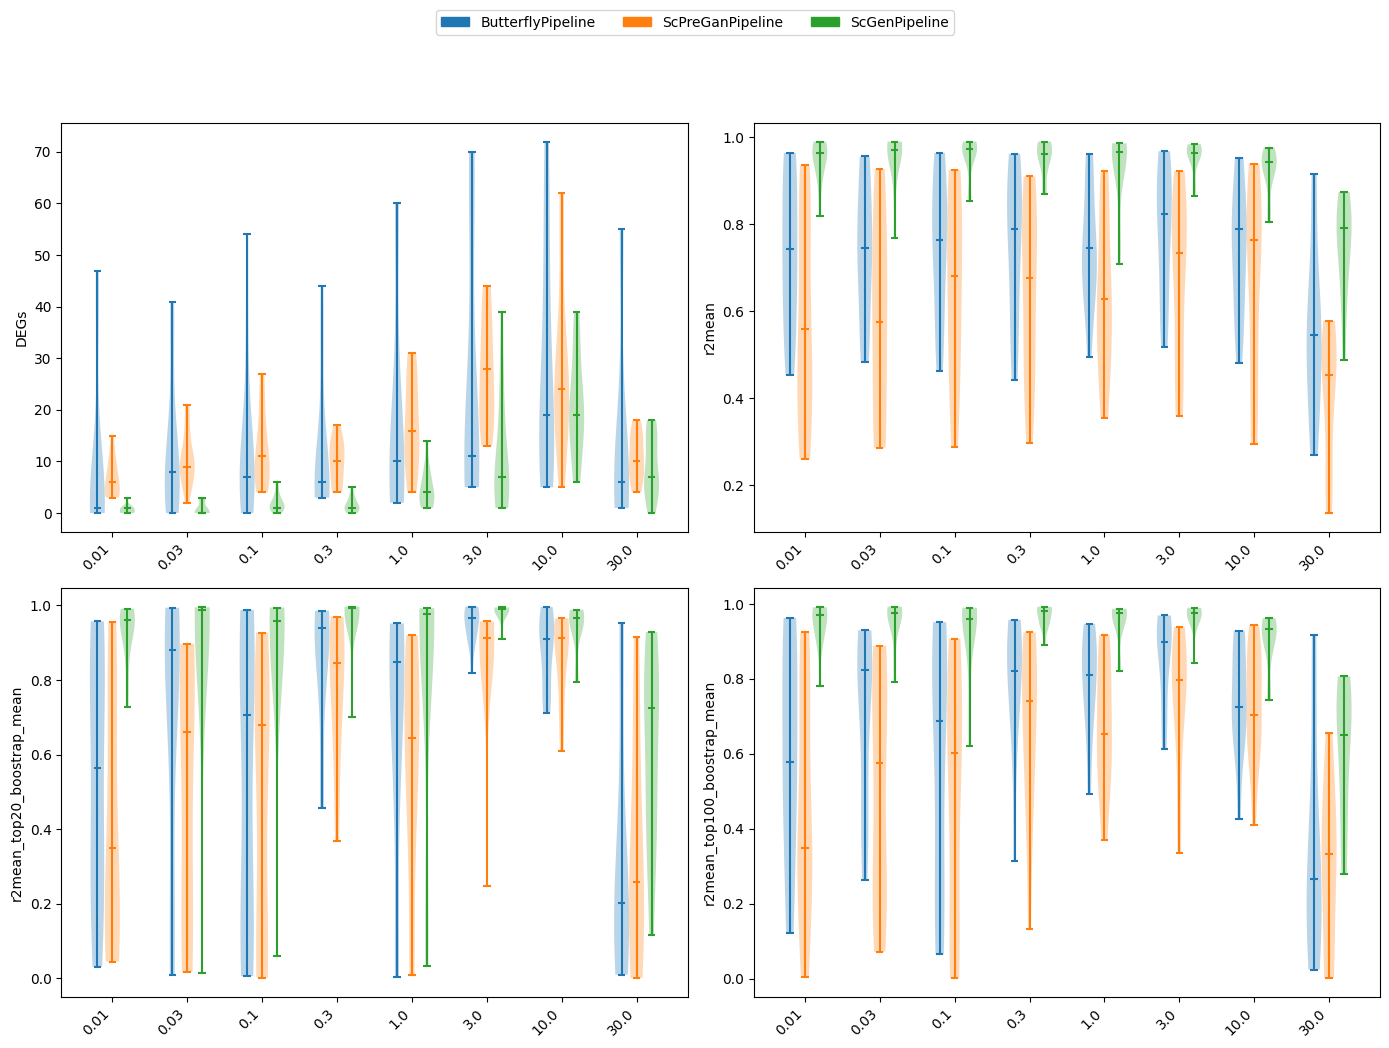

In [152]:
get_plot(
    metric="DEGs",
    dataset_name="NaultPipeline",
    x_key="cell_type_test",
    y_key="dose",
    dim_to_reduce=DimToReduce.X,
    plot_type=PlotType.Violin,
    title=""
)

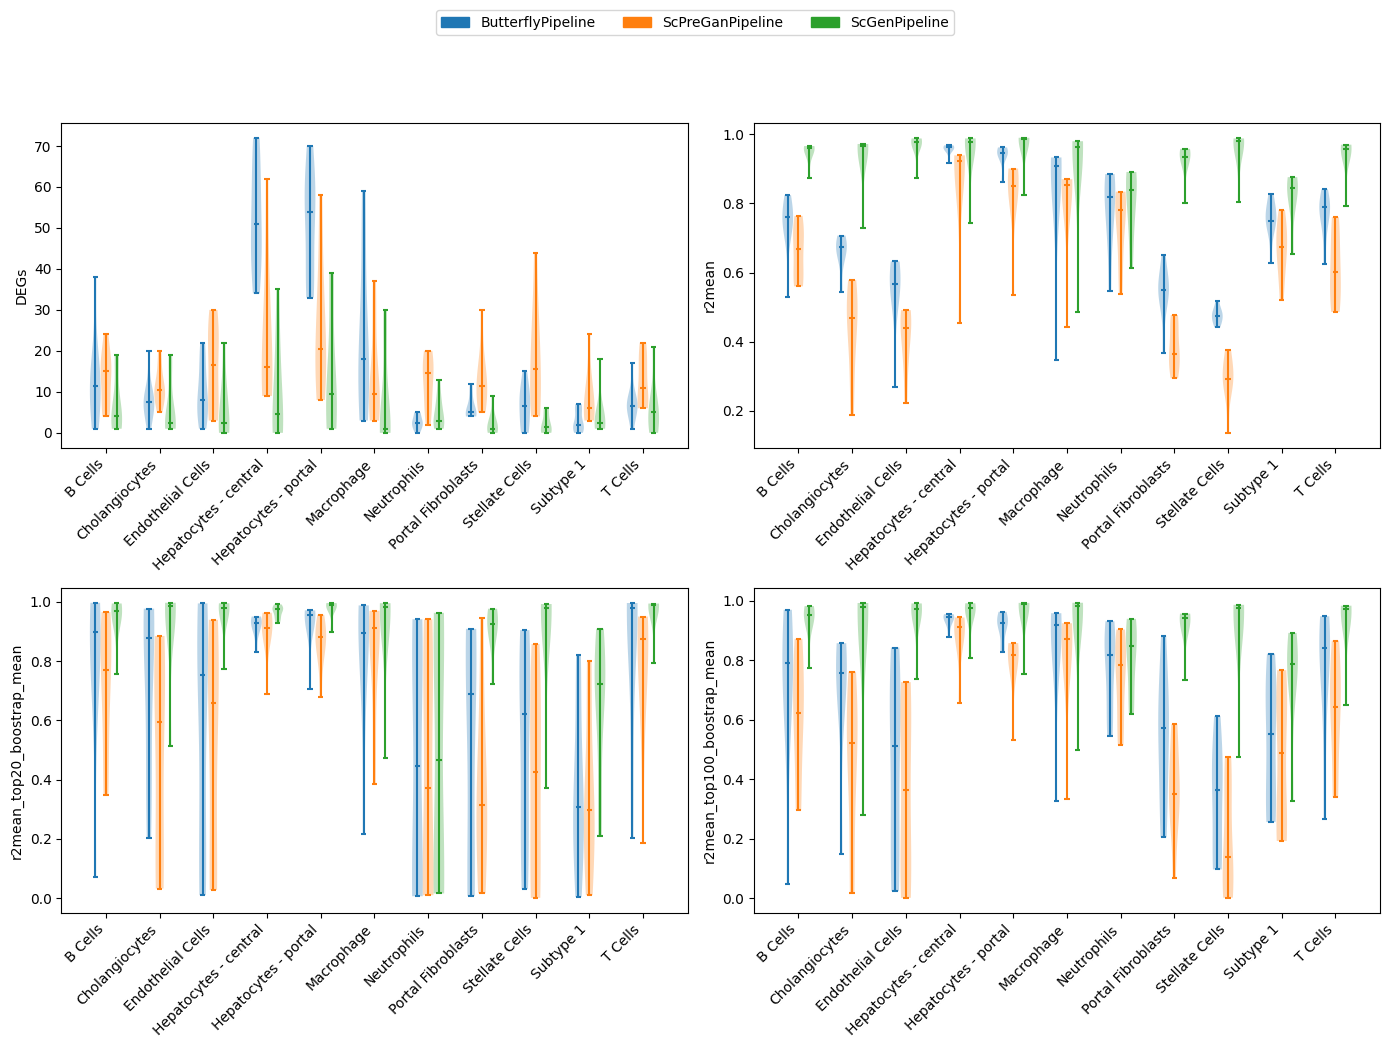

In [153]:
get_plot(
    metric="DEGs",
    dataset_name="NaultPipeline",
    x_key="cell_type_test",
    y_key="dose",
    dim_to_reduce=DimToReduce.Y,
    plot_type=PlotType.Violin,
    title=""
)

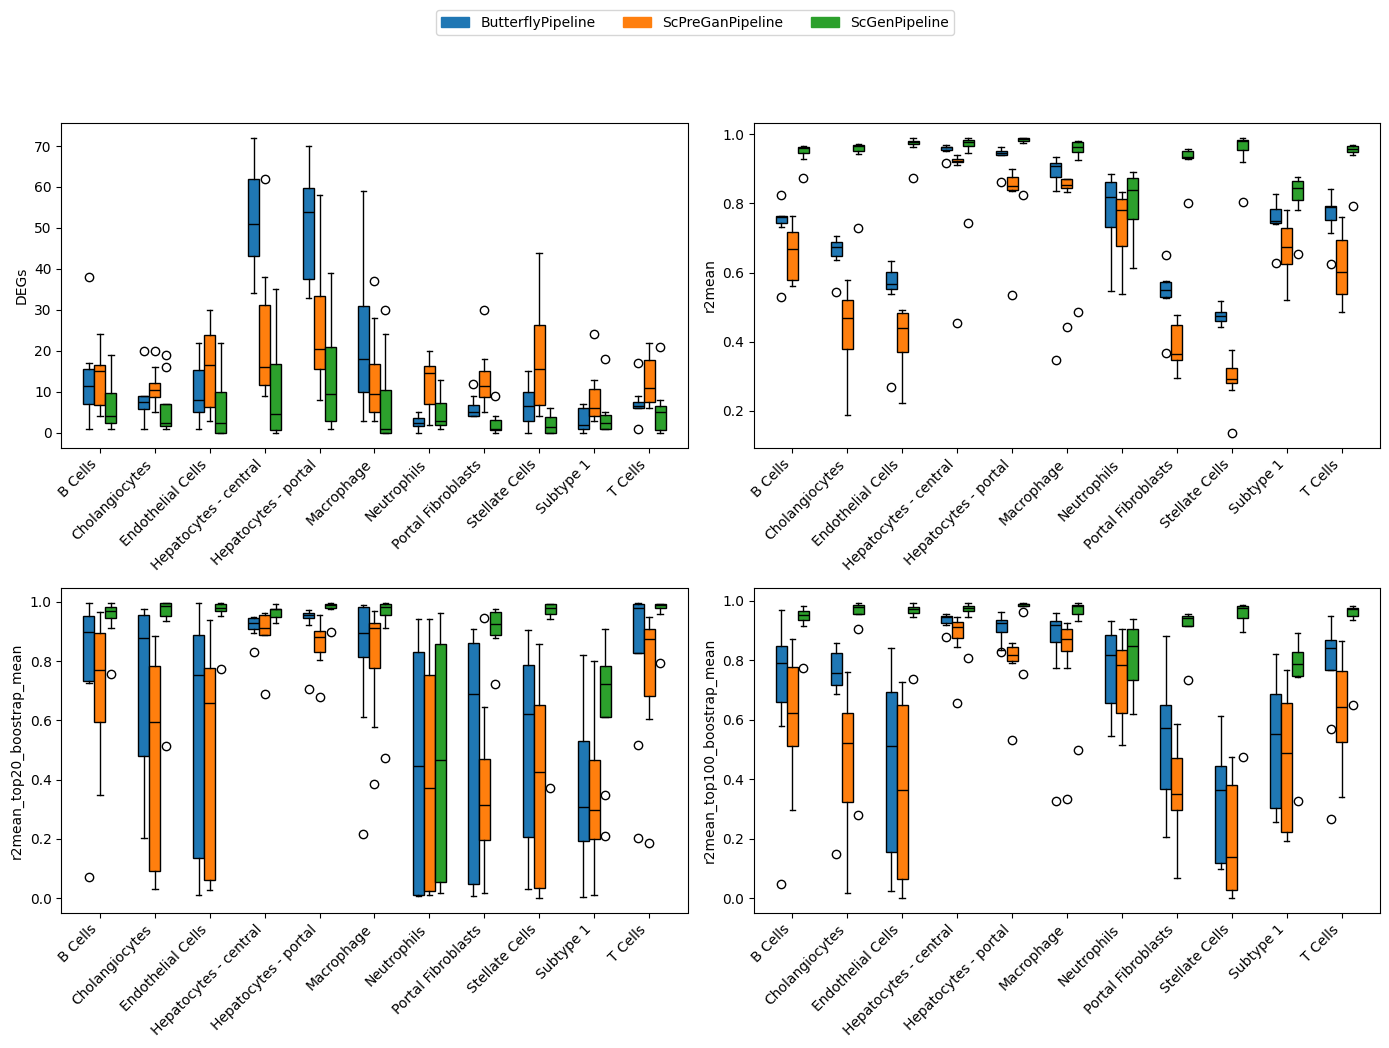

In [154]:
get_plot(
    metric="DEGs",
    dataset_name="NaultPipeline",
    x_key="cell_type_test",
    y_key="dose",
    dim_to_reduce=DimToReduce.Y,
    plot_type=PlotType.Boxplot,
    title=""
)

## 3d plots

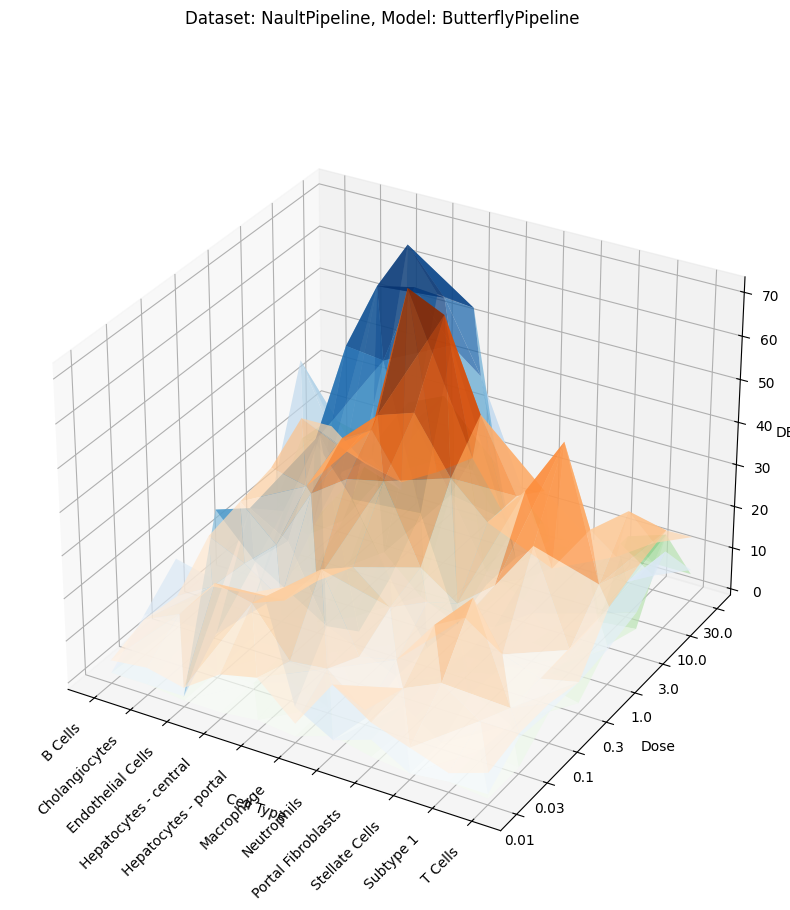

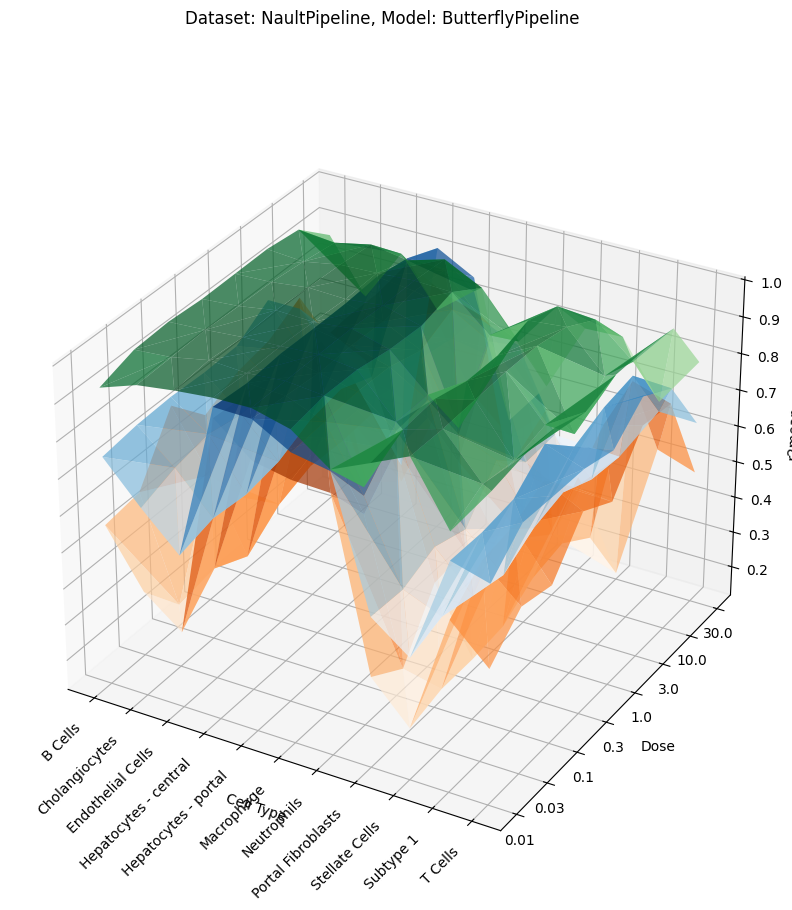

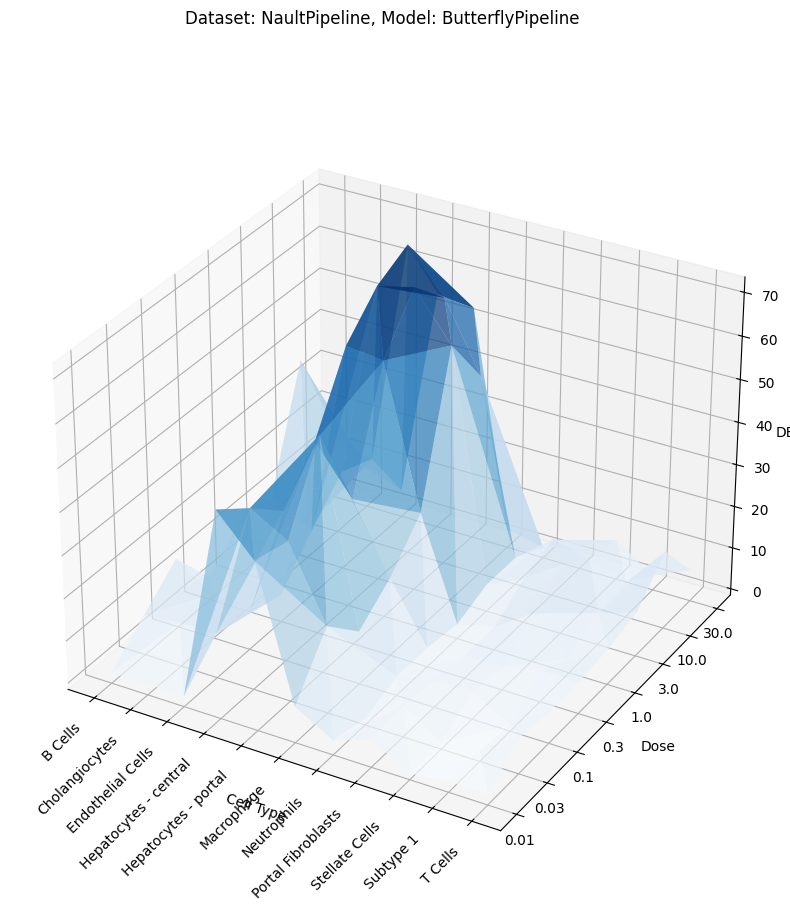

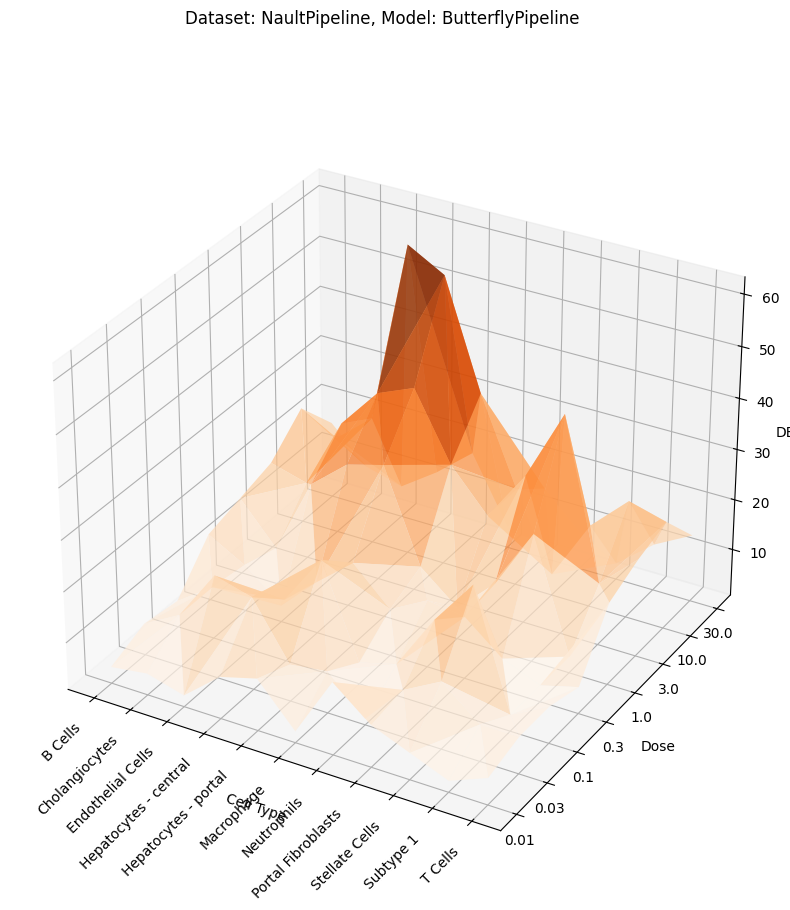

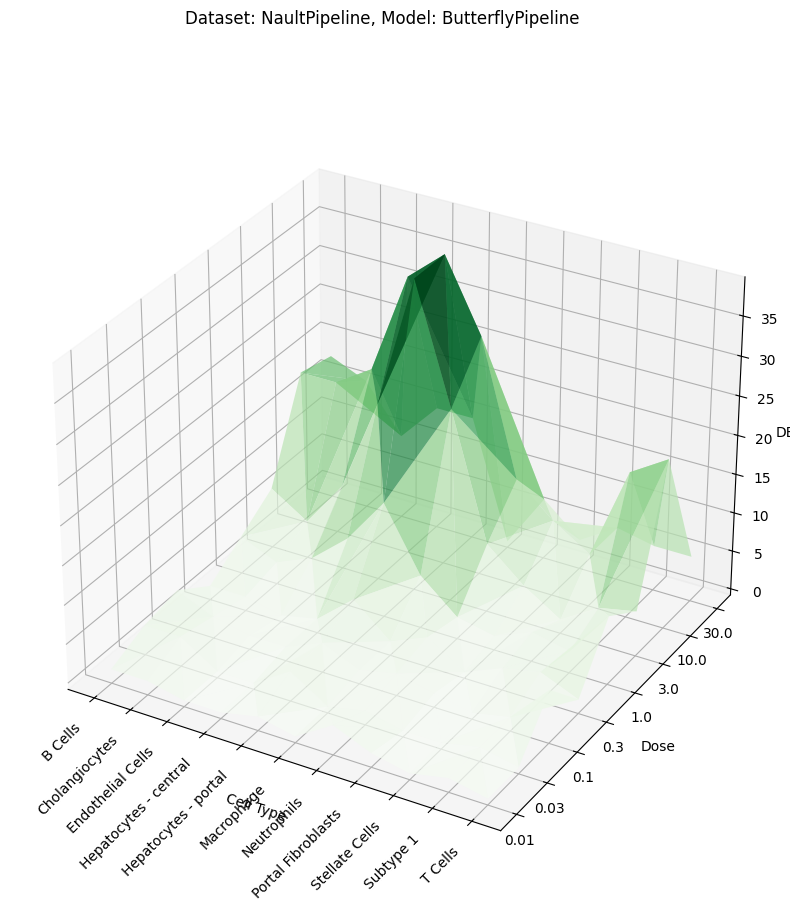

In [50]:
# 3d plot

import matplotlib.pyplot as plt
import numpy as np



def get_3d(metric, models=MODELS, dataset_name='NaultPipeline'):
    dataset = METRICS_DF[METRICS_DF['dataset'] == dataset_name].sort_values(by=['dose', 'cell_type_test'])
    x_labels = sorted(dataset['cell_type_test'].unique().tolist())
    y_labels = sorted(dataset['dose'].unique().tolist())
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')


    def per_model(model: str):
        dataset_model = dataset[dataset['model'] == model]
        x_numeric, _ = pd.factorize(dataset_model['cell_type_test'])
        y_numeric, _ = pd.factorize(dataset_model['dose'])
        ax.plot_trisurf(x_numeric, y_numeric, dataset_model[metric], cmap=color_maps[model], linewidth=0.1)


    for model in models:
        per_model(model)


    #Set axis labels and original tick labels
    ax.set_xlabel("Cell Type")
    ax.set_ylabel("Dose")
    ax.set_zlabel(metric)

    # Set original string labels on ticks
    ax.set_xticks(np.arange(len(x_labels)))
    ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=10)  # Rotate and adjust font size
    ax.set_yticks(np.arange(len(y_labels)))
    ax.set_yticklabels(y_labels, rotation=0, ha='right', fontsize=10)  # Rotate and adjust font size

    fig.suptitle('Dataset: NaultPipeline, Model: ButterflyPipeline')

    # Show plot
    plt.show()
    
get_3d('DEGs')
get_3d('r2mean')

for model in MODELS:
    get_3d('DEGs', [model])

## Contour across models

min 0 max 72


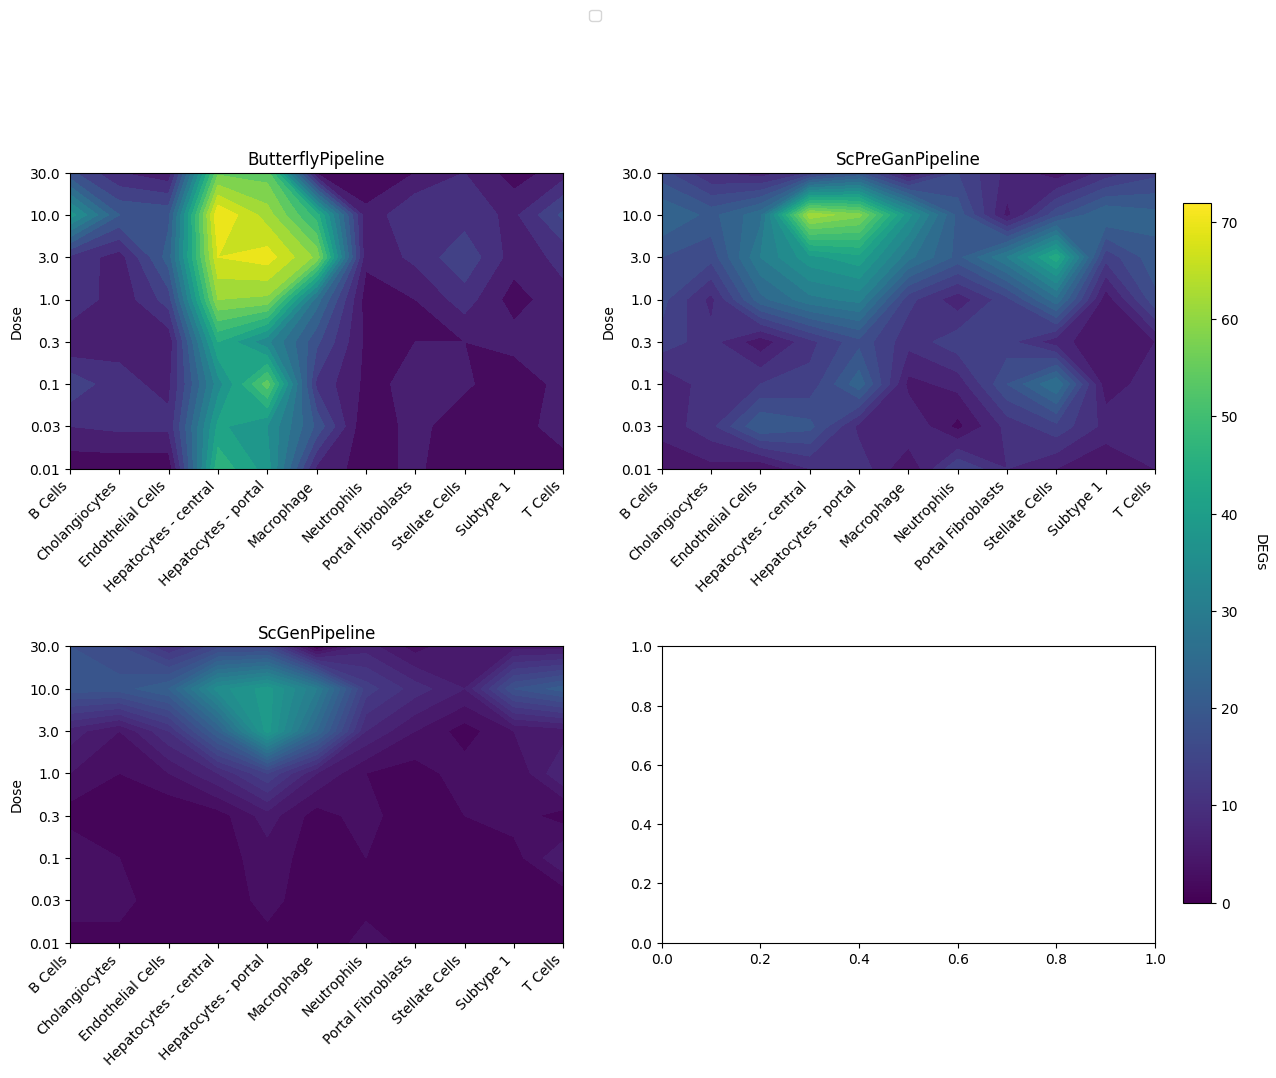

min 0.136 max 0.99


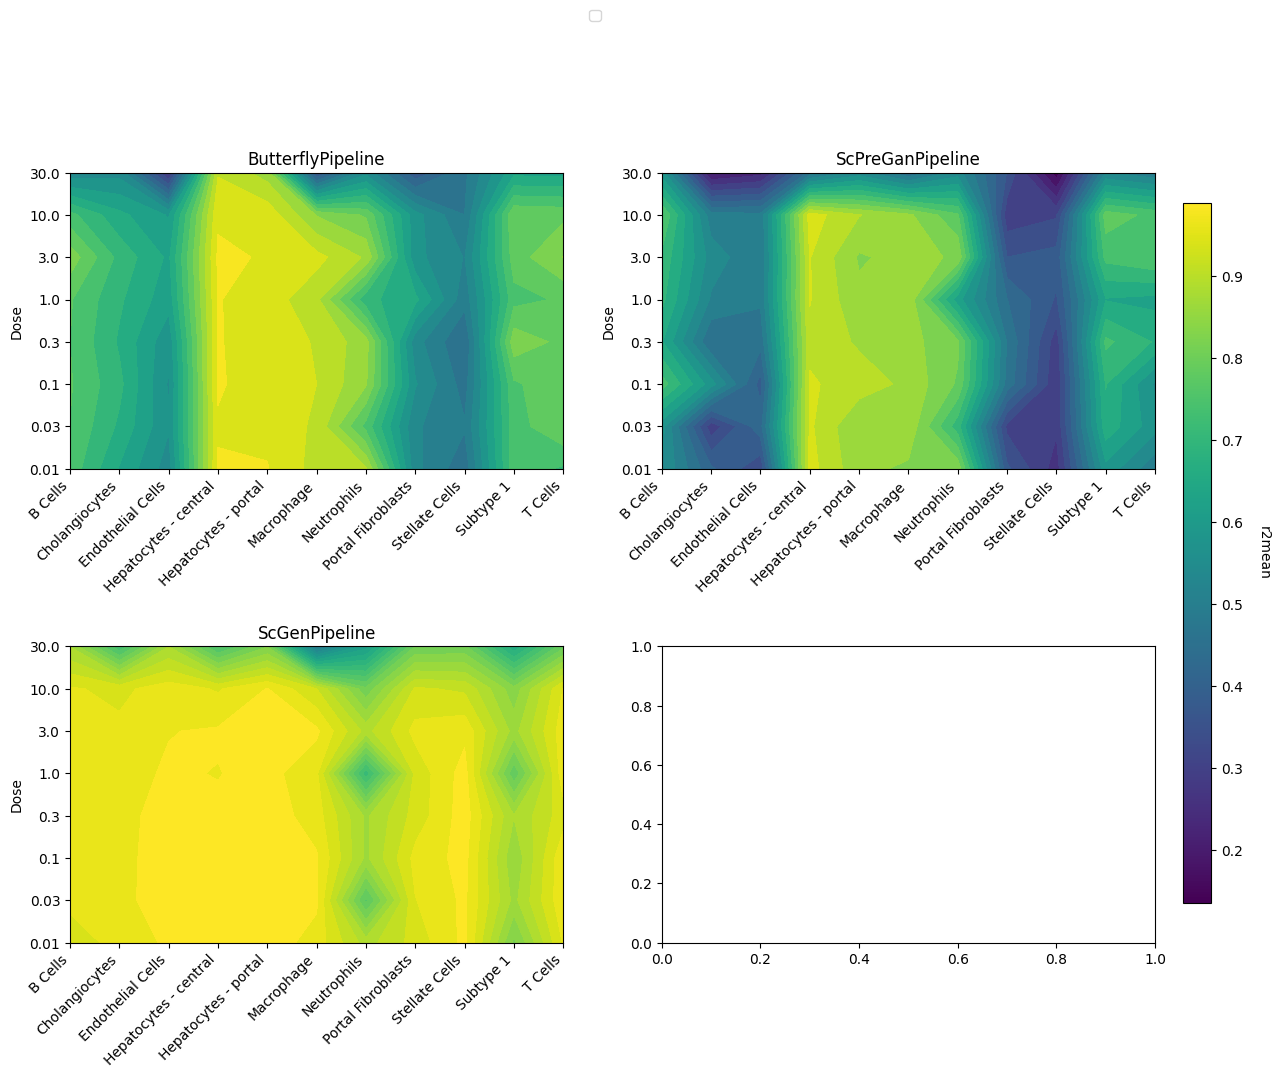

min 0.0004756637511496 max 0.9969289938009368


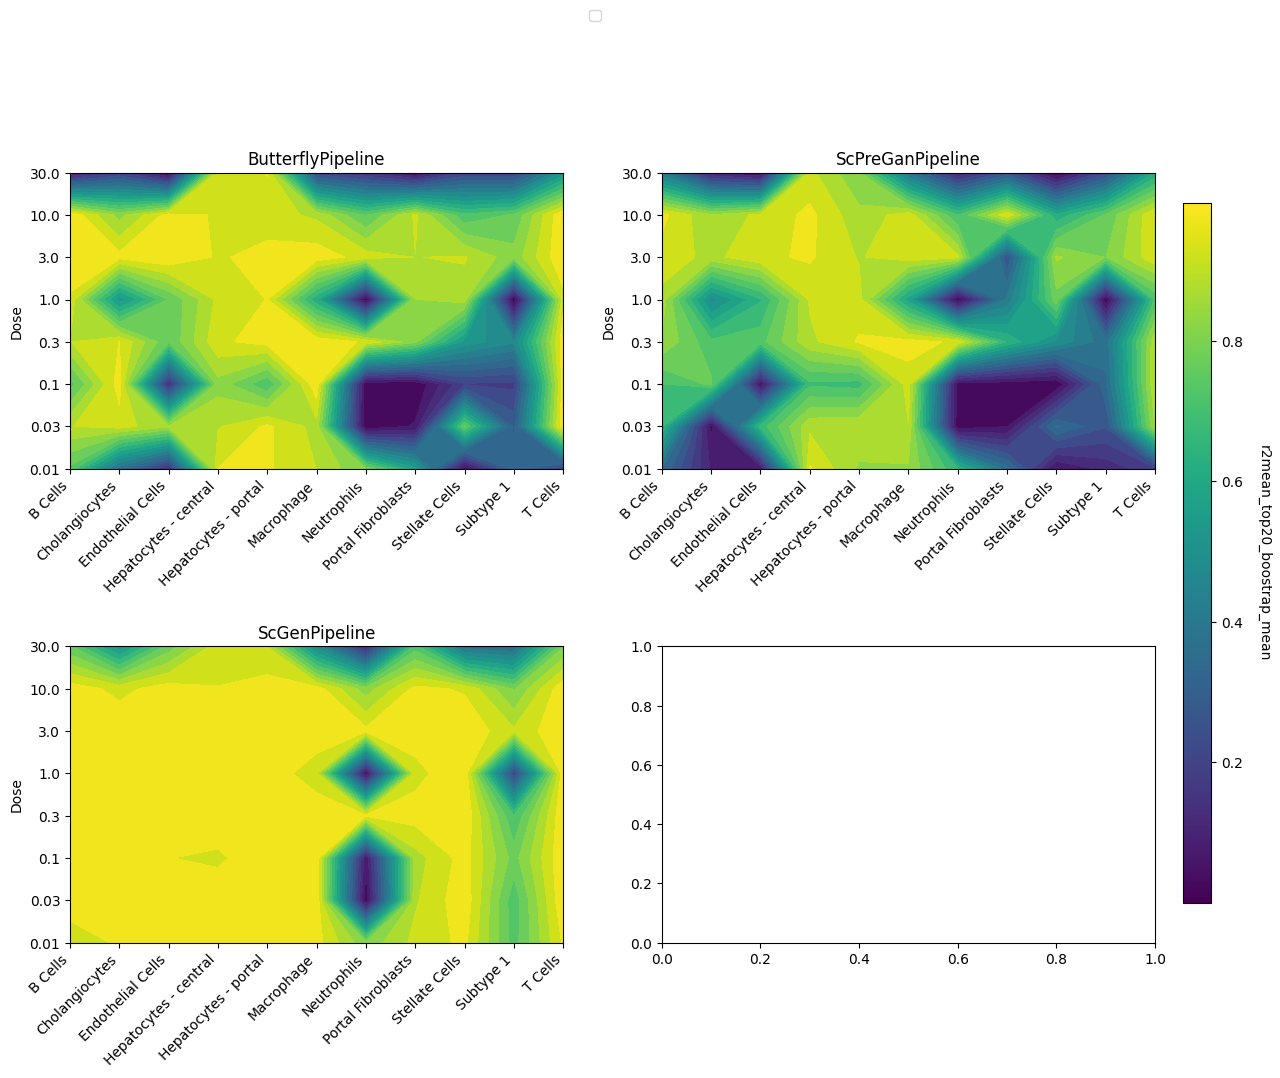

min 0.0018621288989767 max 0.9930801332535686


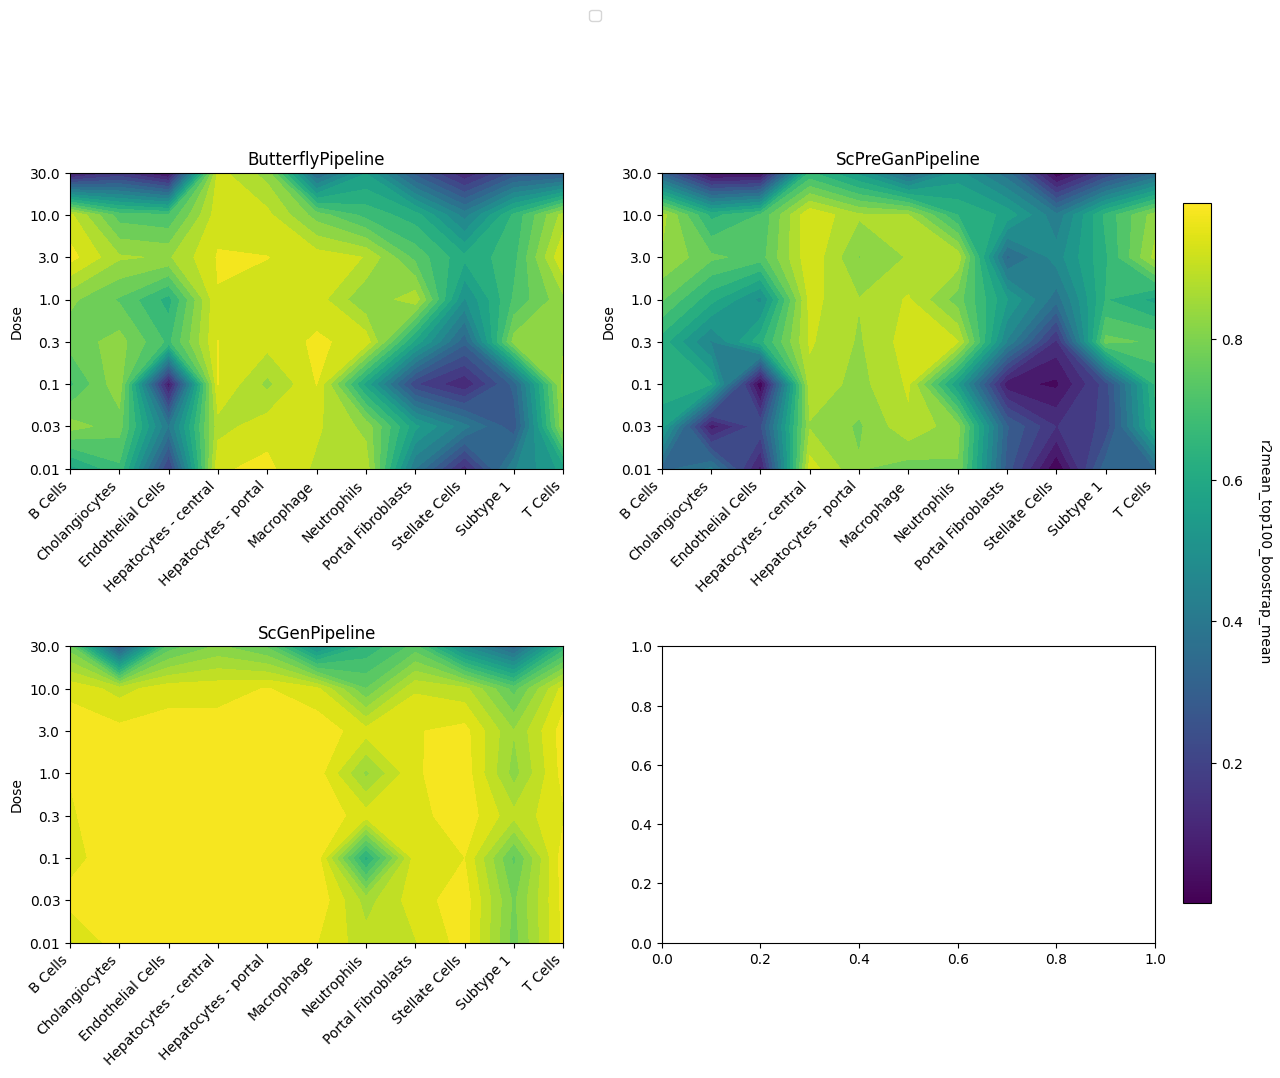

In [89]:
from matplotlib import colors

def get_contour(metric, models=MODELS, dataset_name='NaultPipeline'):
    dataset = METRICS_DF[METRICS_DF['dataset'] == dataset_name].sort_values(by=['dose', 'cell_type_test'])
    x_labels = sorted(dataset['cell_type_test'].unique().tolist())
    y_labels = sorted(dataset['dose'].unique().tolist())
        
    x = np.arange(len(x_labels))
    y = np.arange(len(y_labels))
    
    z_min = dataset[metric].min()
    z_max = dataset[metric].max()
    
    print("min", z_min, "max", z_max)

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()

    for i, model in enumerate(models):
        ax = axes[i]
        
        dataset_model  = dataset[dataset['model'] == model]
        
        Z = dataset_model.pivot_table(index='cell_type_test', columns='dose', values=metric).T.values

        X, Y = np.meshgrid(x, y)
        
        contour = ax.contourf(X, Y, Z, levels=20, cmap="viridis", vmin=z_min, vmax=z_max)
        #ax.colorbar(contour)
        
        ax.set_xticks(x)
        ax.set_xticklabels(x_labels, rotation=45, ha='right')
        ax.set_yticks(y)
        ax.set_ylabel('Dose')
        ax.set_yticklabels(y_labels, rotation=0, ha='right')
        ax.set_title(f"{model}")
    
    sm = cm.ScalarMappable(cmap="viridis", norm=colors.Normalize(vmin=z_min, vmax=z_max))
    sm.set_array([])  # Only needed for ScalarMappable
        
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
    colorbar = fig.colorbar(sm, cax=cbar_ax)
    colorbar.set_label(f'{metric}', rotation=270, labelpad=20)  # Add title with rotation

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)
    #fig.suptitle(f'Dataset {dataset_name} and metric {metric}')

    #fig.tight_layout(pad=2.0, h_pad=1.0, w_pad=1.0)
    plt.subplots_adjust(right=0.9, hspace=0.6, wspace=0.2)
    #plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    
for metric in METRICS:
    get_contour(metric)

## 3d interactive

In [45]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np


def get_3d(metric, models=MODELS, dataset='NaultPipeline'):
    dataset = METRICS_DF[METRICS_DF['dataset'] == dataset].sort_values(by=['dose', 'cell_type_test'])
    x_labels = sorted(dataset['cell_type_test'].unique().tolist())
    y_labels = sorted(dataset['dose'].unique().tolist())

    
    # Initialize the 3D plot
    fig = go.Figure()

    def per_model(model: str):
        dataset_model = dataset[dataset['model'] == model]
        x_numeric, x_labels = pd.factorize(dataset_model['cell_type_test'])
        y_numeric, y_labels = pd.factorize(dataset_model['dose'])
        z_values = dataset_model[metric]

        # Add a 3D mesh for each model
        fig.add_trace(go.Mesh3d(
            x=x_numeric, 
            y=y_numeric, 
            z=z_values,
            # alphahull=6,
            colorbar_title=metric,
            colorscale=color_maps[model],
            intensity=z_values,  # Intensity provides shading based on Z values
            name=model,
            opacity=0.7,
            showscale=False
        ))

    # Plot each model with its corresponding color map
    for model in MODELS:
        per_model(model)

    # Update layout with axis labels and tick text for categorical values
    fig.update_layout(
        scene=dict(
            xaxis=dict(
                title="",
                tickvals=np.arange(len(x_labels)),
                ticktext=x_labels,
                tickangle=45,
            ),
            yaxis=dict(
                title="Dose",
                tickvals=np.arange(len(y_labels)),
                ticktext=y_labels,
            ),
            zaxis=dict(title="DEGs"),
        ),
        title="Dataset: NaultPipeline, Models Comparison",
    )

    # Show plot
    fig.show()

get_3d('DEGs')
get_3d('r2mean')

## Violin plots for the most differentially expressed gene

In [155]:
# evaluation can return the eval data for subsequent analysis, we should get the latent space as well
# the reason to return the eval data is for comparison across models and datasets

## Compare scpregan and scpregan-reproducibility

In [156]:
from typing import Optional
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from typing import List

from thesis import SAVED_RESULTS_PATH


def _plot_2d_metrics_scpregan(dataset: DataFrame, title: str, x_labels: List[str]):
    df_scpregan = dataset[dataset['model'] == 'ScPreGanPipeline']
    df_scpregan_repro = dataset[dataset['model'] == 'ScPreGanReproduciblePipeline']

    
    # Define unique cell types and bar positions
    x = np.arange(len(x_labels))  # Label locations
    width = 0.2  # Width of the bars for each model

    # List of metrics to plot
    metrics = ["DEGs", "r2mean", "r2mean_top20_boostrap_mean", "r2mean_top100_boostrap_mean"]

    # Create a 2x2 grid of subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Adjust size as needed
    axes = axes.flatten()  # Flatten to easily iterate over axes

    # Plot each metric on a different subplot
    for i, metric in enumerate(metrics):
        ax = axes[i]

        # Plot each model’s bars at slightly different x positions
        bar1 = ax.bar(x - width, df_scpregan[metric], width, label='ScPreGanPipeline', alpha=0.7)
        bar2 = ax.bar(x + width, df_scpregan_repro[metric], width, label='ScPreGanReproduciblePipeline', alpha=0.7)

        # Labeling and formatting
        ax.set_xticks(x)
        ax.set_xticklabels(x_labels, rotation=45, ha='right')
        ax.set_ylabel(metric)
        ax.set_title(f"Comparison of {metric}")

    # Set up a single legend by grabbing handles and labels from one of the subplots
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)
    fig.suptitle(title)

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space at the top for the legend
    plt.show()
    

def plot_2d_metrics_per_cell_type_scpregan(dataset_pipeline: str, title: str, dosage: Optional[float] = None, perturbation: Optional[str] = None):
    metrics_df = pd.read_csv(SAVED_RESULTS_PATH / "metrics2.csv")
    dataset = metrics_df[metrics_df['dataset'] == dataset_pipeline]
    if dosage is not None:
        dataset = dataset[dataset['dose'] == dosage]
    if perturbation is not None:
        dataset = dataset[dataset['perturbation'] == perturbation]
        
    cell_types = dataset['cell_type_test'].unique().tolist()
    _plot_2d_metrics_scpregan(dataset=dataset, title=title, x_labels=cell_types)


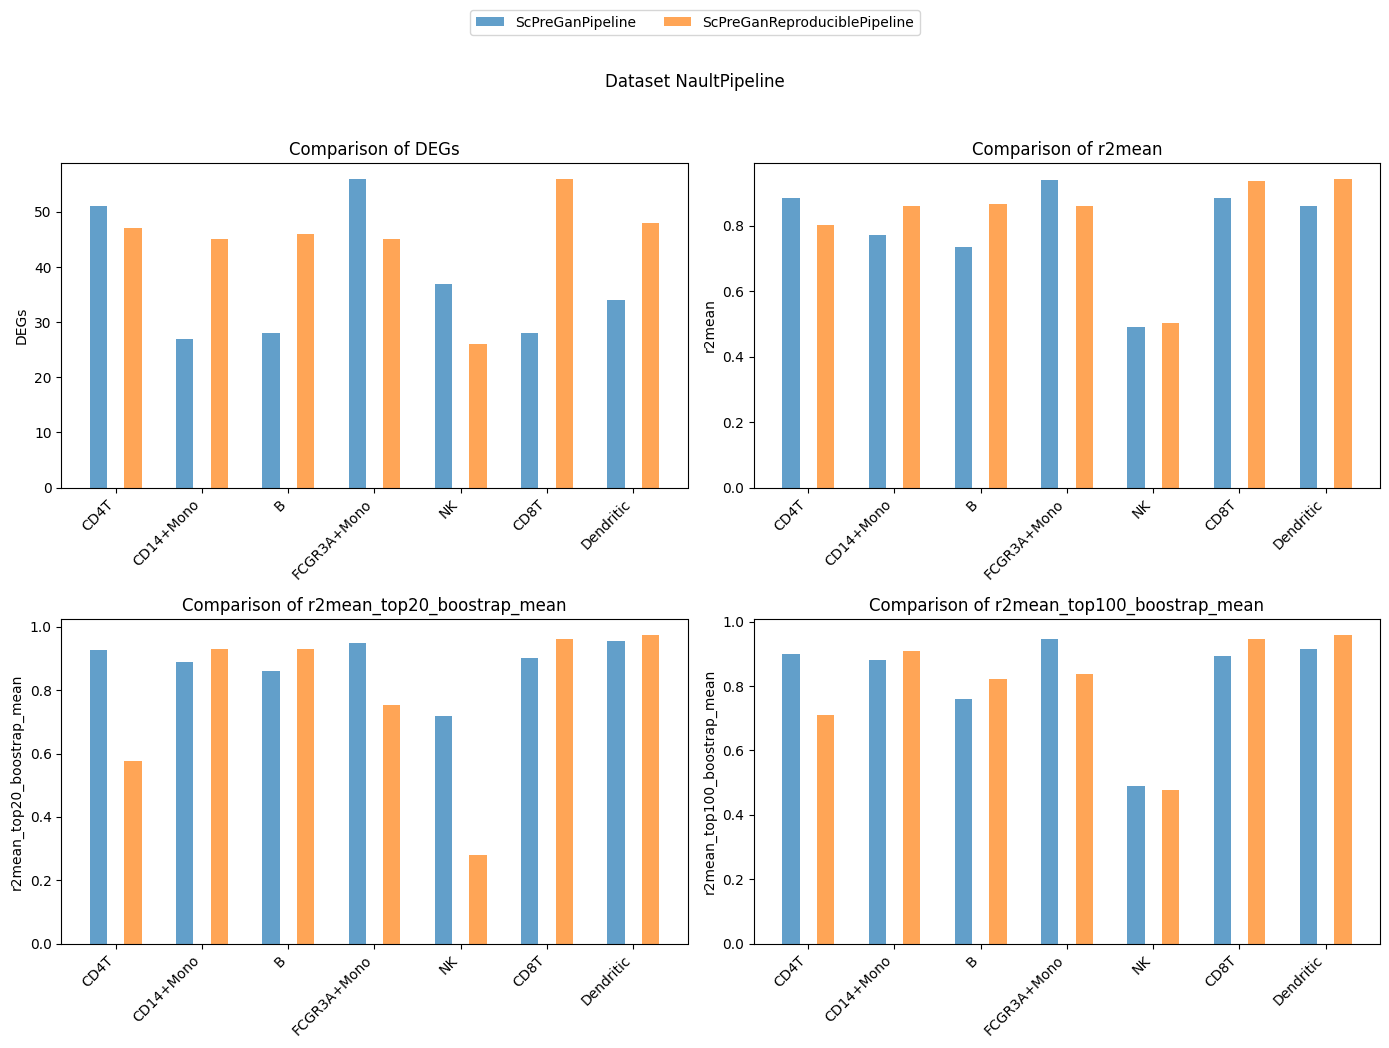

In [157]:
plot_2d_metrics_per_cell_type_scpregan(dataset_pipeline='PbmcPipeline', title='Dataset NaultPipeline')